# HW 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [3]:
diamonds_df = pd.read_csv('diamonds.csv')

In [5]:
diamonds_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


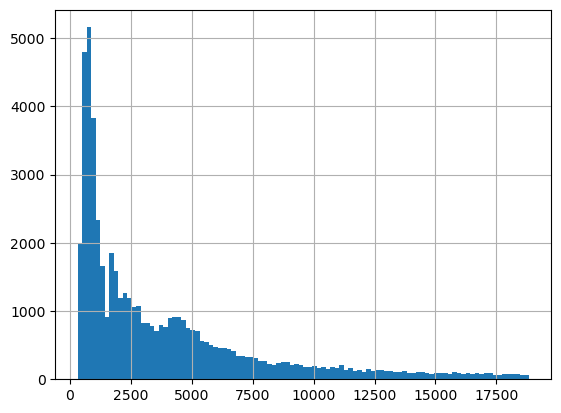

In [8]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [9]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [11]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [13]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [15]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [28]:
reg = LinearRegression().fit(X_train, y_train)

In [30]:
y_pred = reg.predict(X_test)

In [32]:
score = r2_score(y_test, y_pred)

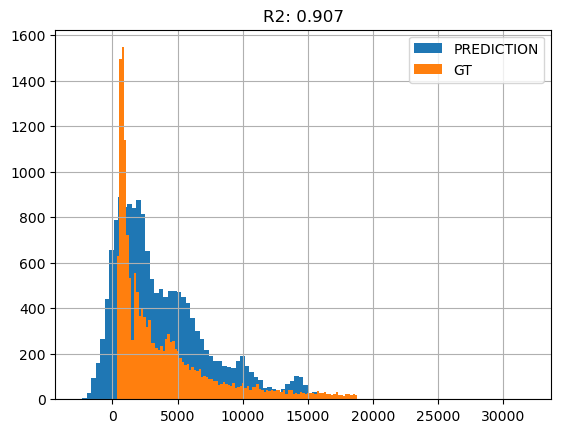

In [34]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [38]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(self, learning_rate=0.01, n_iter=1000):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        
        self._weights = None

    def get_grad(self, X, y):
        return (2 / y.shape[0]) * X.T @ (X @ self._weights - y) # В качестве функции потерь взята MSE

    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        X = np.hstack([np.ones((X.shape[0], 1)), X]) # Чтобы представить линейную регрессию как просто скалярное произведение входных данных и вектора весов
        self._weights = np.random.normal(0.0, 0.3, (X.shape[1], 1))
        for i in range(self.n_iter):
            grad =  self.get_grad(X, y)
            self._weights = self._weights - self.learning_rate * grad
            
        return self
            

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        X = np.hstack([np.ones((X.shape[0], 1)), X]) # См. метод fit 
        return X @ self._weights

    def get_params(self):
        """
        Возвращает обученные параметры модели
        """
        return self._weights # self._weights[0] - свободный член регрессии


In [40]:
regGD = LinearRegressorGD(0.01, 10000).fit(X_train, y_train)

In [41]:
y_pred_GD = regGD.predict(X_test)

In [46]:
score_GD = r2_score(y_test, y_pred_GD)

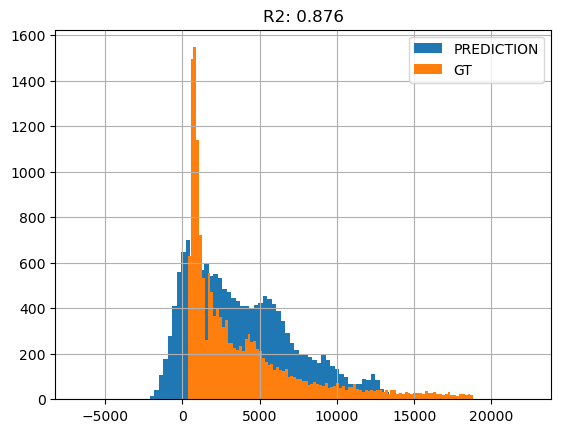

In [48]:
plt.title(f'R2: {str(score_GD)[:5]}')
plt.hist(y_pred_GD.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации нужно использовать sigmoid

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [21]:
from sklearn.preprocessing import StandardScaler

class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=100):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.n_iter = n_iter

        self.layers = None

        self.scaler_X = StandardScaler()
        self.scaler_y = StandardScaler()

    def sigmoid(self, output):
        return 1 / (1 + np.exp(-output))
        
    def forward(self, X):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        H = [] # Массив выходов всех скрытых слоев.
        current = np.hstack([np.ones((X.shape[0], 1)), X])
        H.append(current) # H0 - выходы нулевого слоя т.е. входные сигналы)
        for i in range(len(self.layers) - 1):
            current = self.sigmoid(current @ self.layers[i])
            current = np.hstack([np.ones((current.shape[0], 1)), current])
            H.append(current)
        output = current @ self.layers[-1] # Тождественная функция активации на последнем слое
        return output, H

    def backward(self, H, y, y_hat):
        """
        Реализация backward pass

        Возвращает:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
            y_hat (np.ndarray): Вектор выходных значений сети длины n_samples
        """
        y = y.reshape(-1, 1)
        n = H[0].shape[0]
        dL_dW = []
        
        dL_dy_hat = (y_hat - y) / n
        dL_dW_output = H[-1].T @ dL_dy_hat
        dL_dW.append(dL_dW_output)
        dL_dZi_plus1 = dL_dy_hat

        for i in range(len(self.layers) - 1, 0, -1):
            dZi_plus1_dHi = self.layers[i][1:, :].T # Чтобы не учитывать первую строку, по факту ялвяющуюся вектором смещения
            dHi_dZi = H[i][:, 1:]*(1 - H[i][:, 1:]) # Чтобы не учитывать единичный столбец, добавленный для учета смещений в вычислении следующих выходов
            dZi_dWi = H[i-1].T

            dL_dZi = dL_dZi_plus1 @ dZi_plus1_dHi * dHi_dZi
            dL_dWi = dZi_dWi @ dL_dZi
            dL_dW.append(dL_dWi)
            dL_dZi_plus1 = dL_dZi
            
        return dL_dW

    def find_loss(self, y, y_hat):
        return np.mean((y - y_hat) ** 2)

    def fit(self, X, y):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        X = self.scaler_X.fit_transform(X)
        y = self.scaler_y.fit_transform(y.reshape(-1, 1))
        # Если не нормировать данные (в частности массив y), то возникает следующая ситуация: т.к. выходы последнего скрытого слоя
        # проходят через функцию сигмоида, они лежат в диапазоне 0-1, умножаются на веса, которые изначально инициализированы также 
        # небольшими значениями, взвешенная сумма получается небольшая, поэтому для предсказания достаточно больших значений
        # (средняя цена в тренировочной выборке diamomds ~3950) начинает быстро увеличиваться значение смещения. В итоге смещение
        # стремится к среднему таргету выборки, а значения весов к нулю, что практически превращает перцептрон в функцию константы.
        # Для избежания этого вектор y нормируется, выходные значения уменьшаются, и веса последнего слоя начинают играть большую роль,
        # что не дает провалиться в локальный минимум, описанный выше.
        
        self.layers = []
    
        weights = np.random.normal(0.0, 0.3, (X.shape[1], self.hidden_layer_sizes[0]))
        biases = np.zeros((1, self.hidden_layer_sizes[0]))
        self.layers.append(np.vstack([biases, weights]))
    
        for i in range(1, len(self.hidden_layer_sizes)):
            weights = np.random.normal(0.0, 0.3, (self.hidden_layer_sizes[i - 1], self.hidden_layer_sizes[i]))
            biases = np.zeros((1, self.hidden_layer_sizes[i]))
            self.layers.append(np.vstack([biases, weights]))

        weights = np.random.normal(0.0, 0.3, (self.hidden_layer_sizes[-1], 1))
        biases = np.zeros((1, 1))
        self.layers.append(np.vstack([biases, weights]))

        losses = []
        for i in range(self.n_iter):
            y_hat, H = self.forward(X)
            losses.append(self.find_loss(y, y_hat))
            dL_dW = self.backward(H, y, y_hat)
            for j in range(len(self.layers)):
                self.layers[-1 - j] = self.layers[-1 - j] - self.learning_rate * dL_dW[j] # Т.к. производые вычислялись от последного слоя к первому

        return self, losses

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        X = self.scaler_X.transform(X)
        current = np.hstack([np.ones((X.shape[0], 1)), X])
        for i in range(len(self.layers) - 1):
            current = self.sigmoid(current @ self.layers[i])
            current = np.hstack([np.ones((current.shape[0], 1)), current])
        output = current @ self.layers[-1]
        return self.scaler_y.inverse_transform(output) # Чтобы выводить цены не в нормированном виде


In [23]:
MLPreg, losses = MLPRegressor(hidden_layer_sizes=(10,), learning_rate=0.01, n_iter=10000).fit(X_train, y_train)

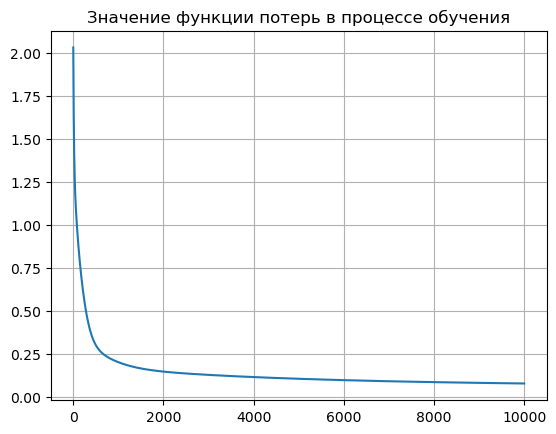

In [24]:
plt.title('Значение функции потерь в процессе обучения')
plt.plot(np.arange(1, len(losses) + 1), losses)
plt.grid()

In [25]:
y_pred_MLP = MLPreg.predict(X_test)

In [26]:
score_MLP = r2_score(y_test, y_pred_MLP)

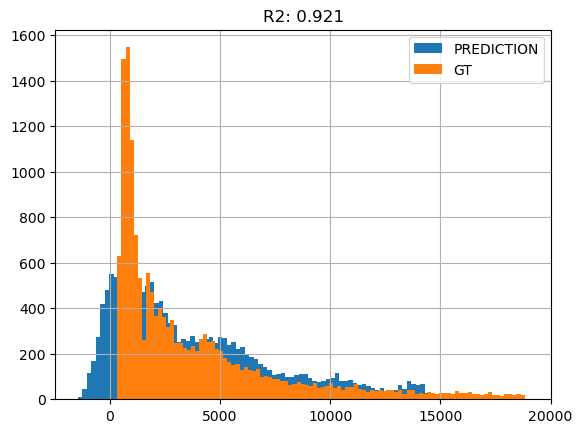

In [27]:
plt.title(f'R2: {str(score_MLP)[:5]}')
plt.hist(y_pred_MLP.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

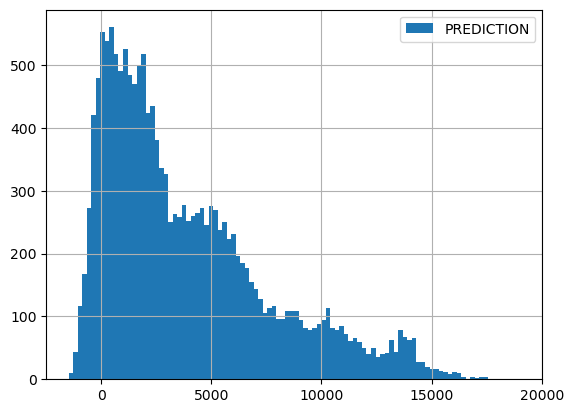

In [28]:
plt.hist(y_pred_MLP.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.legend()
plt.grid();

In [29]:
y_pred_MLP.reshape(1, -1)[0]

array([ 777.57139484,  228.09631273, -142.77770867, ..., -830.7324479 ,
       5457.46336365,  916.40968082])

In [30]:
y_test.reshape(1, -1)[0]

array([1240,  515,  614, ...,  422, 4142, 1033], dtype=int64)

In [31]:
np.mean(y_train)

3950.2046983420732

In [32]:
np.mean(y_pred_MLP)

3889.834289530016

# Выводы

1) Линейная регрессия, реализованная через градиентый спуск, показывает результат близкий к LinearRegression из sklearn.
2) Получившийся перцептрон обеспечивает стабильное приближение к минимуму функции потерь (MSE) и при предложенной архитектуре показывает лучшее значение метрики R2 по сравнению с линейной регрессией.
3) Для задачи предсказания стоимости возможно имело бы смысл ввести штрафы для отрицательных значений y_hat (стоимость неотрицательна).